<h1 STYLE="padding-left:1em;text-align: center;">Projet 04 : Segmentation des clients d'un site e-commerce Olist </h1> 

#  Introduction  
<p STYLE="padding-left:1em;text-align:justify;">Olist souhaite fournir à ses équipes d'e-commerce une segmentation de ses clients utilisable au quotidien pour leurs campagnes de communication.

<p STYLE="padding-left:1em;text-align:justify;">L'objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles anonymisées.

<p STYLE="padding-left:1em;text-align:justify;">Nous allons fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

<p STYLE="padding-left:1em;text-align:justify;">Nous utilisererons donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires.

# Sommaire
<a href="#1" STYLE="padding-left:1em;color:black"><b>Etape 1 : Importation des librairies et des fonctions graphiques</b></a><br>
<a href="#2" STYLE="padding-left:1em;color:black"><b>Etape 2 : Importation des données et sélection des variables pertinentes</b></a><br>
<a href="#3" STYLE="padding-left:1em;color:black"><b>Etape 3 : Fusion des jeux de données</b></a><br>
<a href="#3.1" STYLE="padding-left:2em;color:black">3.1 Fusion des jeux de données : catégories des articles</a><br>
<a href="#3.2" STYLE="padding-left:2em;color:black">3.2 Fusion des jeux de données : commandes et catégories</a><br>
<a href="#3.3" STYLE="padding-left:2em;color:black">3.3 Fusion des jeux de données : commandes, catégories et clients</a><br>
<a href="#3.4" STYLE="padding-left:2em;color:black">3.4 Préparation du jeu de données fusionné</a><br>
<a href="#3.5" STYLE="padding-left:2em;color:black">3.5 Exploration univariée du jeu de donnée</a><br>
<a href="#3.6" STYLE="padding-left:2em;color:black">3.6 Jeu de données clients : segmentation</a><br>
<a href="#4" STYLE="padding-left:1em;color:black"><b>Etape 4 : Export du jeu de donnée</b></a>

# <a STYLE="color:black" id="1">Etape 1 : Importation des librairies et des fonctions graphiques 

In [1]:
%matplotlib inline

from ast import literal_eval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from math import radians, cos, sin, asin, sqrt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 200)

<p STYLE="padding-left:1em;color:blue;"><b>Configuration générale des différents graphiques <font>

In [2]:
plt.rcdefaults()
font_title = {'color': 'blue','weight': 'bold','size': 14}
font_label = {'size': 12}
font_ticks = 12
font_legend = 10
# c = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b','#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
# colors = { x+1 : c[x]  for x in range(len(c))}
c = []
[c.append(plt.cm.tab20(i)) for i in range(20)]
    
def config_plt(plot = plt, ax = None, title = 'titre', X_name = 'x' , Y_name = 'y' , legend = ''):   
    if plot == plt :
        plot.title(title,fontdict=font_title)
        plot.xlabel(X_name,fontdict=font_label)
        plot.ylabel(Y_name,fontdict=font_label)
        plot.xticks(fontsize =font_ticks)
        plot.yticks(fontsize =font_ticks)
        if legend is not None:
            plot.legend(title = legend , fontsize =font_legend)
    else : 
# Sub-plot
        ax.set_title(title,fontdict=font_title)
        ax.set_xlabel(X_name,fontdict=font_label)
        ax.set_ylabel(Y_name,fontdict=font_label)
        ax.tick_params(axis='x', labelsize=font_ticks)
        ax.tick_params(axis='y', labelsize=font_ticks)
        if legend is not None: 
            ax.legend(title = legend , fontsize =font_legend)
            
def cm_to_inch(value):
    return value/2.54

In [3]:
def plot_scatter(DF,x_cols,cols, categorie= None,Nb_cols=2,length=None,width=None,x_lim=None,y_lim =None,title=None,x_name=None,y_name=None,legend=None):
    label = dict() if 'label' not in globals() else globals()['label']
    x_cols = [x_cols] if np.array([x_cols]).size == 1 else x_cols 
    cols = [cols]  if np.array([cols]).size == 1 else cols 
    Nb_var =  1 if np.array([cols]).size == 1 else len(cols)
    Nb_row = round(0.5 + Nb_var/Nb_cols) if Nb_cols> 1 else 1
    width = 4*Nb_cols if width is None else width
    length = 4*Nb_row if length is None else length
    fig = plt.figure(figsize=(width,length))    
    for i in range(0,Nb_var):
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        if categorie is None : 
            if len(x_cols)==1:
                axes.scatter(DF[x_cols[0]],DF[cols[i]],color = c[0],s=1.75)
            else : 
                axes.scatter(DF[x_cols[i]],DF[cols[i]],color = c[0],s=1.75)
        else :
            k=0
            for cat in DF[categorie].unique():
                DF_frac = DF[DF[categorie] == cat]
                if len(x_cols)==1:
                    axes.scatter(DF_frac[x_cols[0]],DF_frac[cols[i]],color = c[k],s=1.75 ,label = cat)
                else : 
                    axes.scatter(DF_frac[x_cols[i]],DF_frac[cols[i]],color = c[k],s=1.75, label = cat)
                k+=1
            legend = str(cat if label.get(cat) is None else label.get(cat))
            
        axes.set_xlim(x_lim) if x_lim !=None else None    
        axes.set_ylim(y_lim) if y_lim !=None else None
        
        j = 0 if len(x_cols)==1 else i
        title_plt = '' if title is None else [title if len([cols]) == 1 else title[i]]    
        if x_name is None : 
            x = str(x_cols[j] if label.get(x_cols[j]) is None else label.get(x_cols[j]))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[j]
        if y_name is None : 
            y = str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
            
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        fig.tight_layout()
    plt.show() 

def plot_bar(DF, x_cols, y_cols = None, Nb_cols=2, inverse_xy=False, height=None, width=None,
             title=None,x_name=None,y_name=None,legend=None):
    
    label = dict() if 'label' not in globals() else globals()['label']
    x_cols = [x_cols]  if np.array([x_cols]).size == 1 else x_cols
    y_cols = None if y_cols is None else [y_cols] if np.array([y_cols]).size == 1 else y_cols  
    Nb_var= (1 if len(x_cols)==1 else len(x_cols)) if y_cols is None else len(y_cols) if len(y_cols) > 1 else 1  
    
    Nb_row = round(0.5 + Nb_var/Nb_cols) if Nb_cols> 1 else 1
    width = 4*Nb_cols if width is None else width
    height = 4*Nb_row if height is None else height
    fig = plt.figure(figsize=(width,height)) 

    for i in range(0,Nb_var):
        cols = x_cols[i] if y_cols is None else x_cols[0]
        if (DF[cols].nunique()>16) & (DF[cols].dtypes == object) & (Nb_cols == 1):
            width = min(DF[cols].nunique()/4,30) 
            fig = plt.figure(figsize=(width,height))
        elif (Nb_cols == 1) :
            width = 4*Nb_cols 
            fig = plt.figure(figsize=(width,height))
        elif (DF[cols].nunique()>16) & (DF[cols].dtypes == object) & ( Nb_cols > 1) :
            width = min(DF[cols].nunique()*Nb_cols/4,30)
            fig.set_figwidth(width)
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1) 
        
        if y_cols is None :
            count = DF.groupby(by=DF[cols])[cols].count().sort_values(ascending = False)
            X = count.index.values
            Y = count.values
        else :
            X = DF.groupby(cols).agg({ y_cols[i] : 'sum'}).reset_index().iloc[:,0]
            Y = DF.groupby(cols).agg({ y_cols[i] : 'sum'}).reset_index().iloc[:,1]
            
        if title is None :
            titre = cols if y_cols is None else y_cols[i]
            title_plt = 'Distribution :\n ' + str(titre if label.get(titre) is None else label.get(titre))
        else : 
            title_plt = title if np.array([cols]).size == 1 else title[i]
        if x_name is None :
            x_nom = cols if y_cols is None else cols
            x = str(x_nom if label.get(x_nom) is None else label.get(x_nom))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[i]
        if y_name is None : 
            y_nom = cols if y_cols is None else y_cols[i]
            y = 'Nombre de '+ str(y_nom if label.get(y_nom) is None else label.get(y_nom))  
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
        
        #plot bar
        if len(X)<=20 : 
            axes.bar(X,Y,color=c[0:len(X)]) if inverse_xy==False else axes.barh(X,Y,color=c[0:len(X)])        
            for j in range(0,len(X)):
                axes.bar(X,Y,width=0,color= c[j],label= X[j]) if inverse_xy==False else axes.barh(X,Y,height=0,color=c[j],label= X[j])
        else : 
            axes.bar(X,Y,color=c[0]) if inverse_xy==False else axes.barh(X,Y,color=c[0])
        
        if inverse_xy==False : 
            axes.set_xticks(X) if X.size<=12 else None
            axes.tick_params(axis='x',rotation = 90)
            config_plt(plot = axes, ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        else :
            axes.set_xticks(Y) if Y.size<=12 else None
            config_plt(plot = axes, ax = axes , title = title_plt , X_name = y, Y_name = x , legend = legend)
    plt.tight_layout()
    plt.show()      
    
def plot_hist(DF, cols, Nb_cols=1 , log ='No',x_lim=None,y_lim =None, title = None , x_name = None, y_name =None , legend = None ):   
    label = dict() if 'label' not in globals() else globals()['label']
    cols = [cols]  if np.array([cols]).size == 1 else cols 
    Nb_var =  1 if np.array([cols]).size == 1 else len(cols)  
    Nb_row = int(Nb_var/Nb_cols + 0.5)
    fig = plt.figure(figsize=(4*Nb_cols,4*Nb_row))               
    for i in range(0,Nb_var): 
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        DF_cols = DF[cols[i]] if x_lim is None else DF[DF[cols[i]]<=max(x_lim)][cols[i]]
        l_bins = 1.0 if (DF_cols.max() - DF_cols.min()) <30 else 2.0   
        bins = np.arange(DF_cols.min(),DF_cols.max()+2*l_bins,l_bins)
        DF_cols = np.log(DF_cols) if log=='yes' else DF_cols
        bins = np.arange(DF_cols.min(),DF_cols.max(),np.log(1.1)) if log=='yes' else bins
        
        bins = 100 if len(bins) > 100 else bins
        
        axes.set_xlim(x_lim) if x_lim !=None else None    
        axes.set_ylim(y_lim) if y_lim !=None else None
        
        if title is None:    
            title_plt = 'Distribution :\n ' + str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            title_plt = [title if np.array([cols]).size == 1 else title[i]]
        if x_name is None: 
            x = str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[i]
        if y_name is None: 
            y = 'Nombre de '+ str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
                     
# Tracer des histogrammes
        axes.hist(DF_cols,bins = bins , align = 'left')
        None  if isinstance(bins, int) else axes.set_xticks(bins) if bins.size <= 12 else None
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        fig.tight_layout()
    plt.show()              
    
def plot_boxplot(DF, categorie,cols,Nb_cols=2,x_lim=None,y_lim = None):
    label = dict() if 'label' not in globals() else globals()['label']
    categorie = [categorie] if np.array([cols]).size == 1 else categorie
    Nb_var =  1 if np.array([cols]).size == 1 else len(cols) 
    
    Nb_row = int(Nb_var/Nb_cols + 0.5)
    fig = plt.figure(figsize=(5*Nb_cols,5*Nb_row))

    for i in range(0,Nb_var):
        fig.add_subplot(Nb_row,Nb_cols,i+1)
        axes = sns.boxplot(data=DF, x=categorie[i], y=cols)
        axes.set_xlim(x_lim) if x_lim is not None else None          
        axes.set_ylim(y_lim) if y_lim is not None else  None
        
        title = 'Influence du '+ str(categorie[i] if label.get(categorie[i]) is None else label.get(categorie[i]))+' sur\n '+ str(cols if label.get(cols)is None else label.get(cols))    
        x = str(categorie[i] if label.get(categorie[i]) is None else label.get(categorie[i]))
        y = 'Distribution de ' + str(cols if label.get(cols) is None else label.get(cols))
        config_plt(plot = plt , title = title , X_name = x, Y_name = y , legend = None)
        plt.xticks(rotation = 90)
    fig.tight_layout()
    plt.show()
    
def mat_cor(DF , cols = None ,sort_var = None):
    label = dict() if 'label' not in globals() else globals()['label']
    if cols is None:
        DF_mat_corr = DF.corr()
        fig=plt.figure(figsize=(DF.columns.size/2,DF.columns.size/2))
    else : 
        DF_mat_corr = DF[cols].corr()
        fig=plt.figure(figsize=(np.array(cols).size/2,4))
    
    if sort_var != None:
        DF_cols = DF_mat_corr[sort_var].sort_values(ascending = False).index
        DF_mat_corr = DF_mat_corr.loc[DF_cols,DF_cols]
    
    mask = np.zeros_like(DF_mat_corr)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(DF_mat_corr, mask = mask,cmap='coolwarm',annot=True, 
                     annot_kws={"size":8 ,'weight':'bold','color':'black'}) 
    
    title = "Coefficients de corrélation de Pearson"
    config_plt(plot = None , ax = ax , title = title , X_name = None , Y_name = None , legend = None)
    plt.show()

# <a STYLE="color:black" id="2">Etape 2 : Importation des données et sélection des variables pertinentes 

In [4]:
customers= pd.read_csv('Data/olist_customers_dataset.csv')
geolocation= pd.read_csv('Data/olist_geolocation_dataset.csv')
order_items= pd.read_csv('Data/olist_order_items_dataset.csv')
order_payments= pd.read_csv('Data/olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('Data/olist_order_reviews_dataset.csv')
orders= pd.read_csv('Data/olist_orders_dataset.csv')
products= pd.read_csv('Data/olist_products_dataset.csv')
sellers= pd.read_csv('Data/olist_sellers_dataset.csv')
product_category= pd.read_csv('Data/product_category_name_translation.csv')

dict_df = {'customers' : customers, 'geolocation' : geolocation,'order_items':order_items,'order_payments':order_payments,
           'order_reviews':order_reviews,'orders':orders,'products':products,'sellers':sellers,'product_category':product_category}

In [5]:
def info_df(dict_df):
    liste_df =[]
    liste_cols = []
    liste_unique = []
    Nb_valeurs = []
    Nb_nuls = []
    Nb_doublons = []
    i = 0
    for nom_df, df in dict_df.items() : 
        for col in df.columns :
            liste_df.append(nom_df)
            liste_cols.append(col)
            Nb_valeurs.append(df[col].shape[0])
            Nb_nuls.append(df[col].isnull().sum())
            try :
                liste_unique.append(df[col].nunique())
                Nb_doublons.append(df[df.duplicated(subset=col)].shape[0])
            except :
                flatten = [val for sublist in df[col].to_list() if sublist is not np.nan for val in sublist ]
                df_flatten = pd.DataFrame([sublist[0] for sublist in flatten], columns = ['liste'])
                liste_unique.append(df_flatten['liste'].nunique())
                Nb_doublons.append(df_flatten[df_flatten.duplicated(subset='liste')].shape[0])       

    info_data = pd.DataFrame(np.array([liste_df,liste_cols,liste_unique,Nb_valeurs,Nb_nuls,Nb_doublons]).T, 
                             columns = ['Nom Data','Nom cols','Valeurs uniques','Nb valeurs', 'Nb valeurs Nan','Nb doublons'])
    return info_data

<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Informations générales des différents jeux de données

In [6]:
info_df(dict_df)

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,customers,customer_id,99441,99441,0,0
1,customers,customer_unique_id,96096,99441,0,3345
2,customers,customer_zip_code_prefix,14994,99441,0,84447
3,customers,customer_city,4119,99441,0,95322
4,customers,customer_state,27,99441,0,99414
5,geolocation,geolocation_zip_code_prefix,19015,1000163,0,981148
6,geolocation,geolocation_lat,717360,1000163,0,282803
7,geolocation,geolocation_lng,717613,1000163,0,282550
8,geolocation,geolocation_city,8011,1000163,0,992152
9,geolocation,geolocation_state,27,1000163,0,1000136


<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Les clients

In [7]:
display(customers.head(3))
customers.drop(['customer_zip_code_prefix','customer_city'], axis = 1 , inplace = True , errors ='ignore')
customers.info()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Les variables importantes de ce jeu de données :<br>
<span STYLE="color:gray;padding-left:2em" ><i> 'customer_id'</i></span> : clé du jeu de données des commandes <br>
<span STYLE="color:gray;padding-left:2em" ><i>'customer_unique_id'</i></span> : Identifiant unique du client <br>
<span STYLE="color:gray;padding-left:2em" ><i>'customer_state'</i></span> : Etat du client

<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Les données de géolocalisation

In [8]:
display(geolocation.head(3))
geolocation.info()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Variables redondantes avec le jeu de données précédent

<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Articles achetés par les clients

In [9]:
display(order_items.head(3))
order_items.drop(['shipping_limit_date','seller_id'], axis = 1 , inplace = True , errors ='ignore')
order_items.info()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Les variables importantes de ce jeu de données :<br>
<span STYLE="color:gray;padding-left:2em" ><i> 'order_id'</i></span> : Identifiant unique de commande <br>
<span STYLE="color:gray;padding-left:2em" ><i>'order_item_id'</i></span> : numéro séquentiel identifiant le nombre d'articles inclus dans le même ordre <br>
<span STYLE="color:gray;padding-left:2em" ><i>'product_id'</i></span> : identifiant unique du produit<br>
<span STYLE="color:gray;padding-left:2em" ><i>'price'</i></span> : prix du produit<br>
<span STYLE="color:gray;padding-left:2em" ><i>'freight_value'</i></span> :  valeur du fret (si une commande comporte plus d'un article, la valeur du fret est répartie entre les articles)<br>

<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Reglements des commandes

In [10]:
display(order_payments.head(3))
order_payments.info()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Les variables importantes de ce jeu de données :<br>
<span STYLE="color:gray;padding-left:2em" ><i> 'order_id'</i></span> : Identifiant unique de commande <br>
<span STYLE="color:gray;padding-left:2em" ><i>'payment_sequential'</i></span> : si plusieurs modes de paiement sont utilisés, une ligne est créée par moyen de paiement <br>
<span STYLE="color:gray;padding-left:2em" ><i>'payment_type'</i></span> : mode de paiement choisi par le client.<br>
<span STYLE="color:gray;padding-left:2em" ><i>'payment_installments'</i></span> : nombre de versements choisis par le client<br>
<span STYLE="color:gray;padding-left:2em" ><i>'payment_value'</i></span> :  valeur de la transaction.<br>

<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Avis clients

In [11]:
display(order_reviews.head(3))
display(order_reviews.info())
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])
order_reviews.drop(['review_comment_title','review_creation_date','review_answer_timestamp'], axis = 1,inplace = True , errors ='ignore')
order_reviews.info()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               99224 non-null  object
 1   order_id                99224 non-null  object
 2   review_score            99224 non-null  int64 
 3   review_comment_message  40977 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Les variables importantes de ce jeu de données :<br>
<span STYLE="color:gray;padding-left:2em" ><i> 'order_id'</i></span> : Identifiant unique de commande <br>
<span STYLE="color:gray;padding-left:2em" ><i>'review_id'</i></span> : identifiant unique du commentaire <br>
<span STYLE="color:gray;padding-left:2em" ><i>'review_score'</i></span> : Note allant de 1 à 5 données par le client dans une enquête de satisfaction<br>
<span STYLE="color:gray;padding-left:2em" ><i>'review_comment_message'</i></span> :  Commentaire laissé par le client<br>

<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Commandes de clients

In [12]:
display(orders.head(3))
print(orders.info())
orders.drop(['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date'], axis = 1 , inplace = True , errors ='ignore')
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders.info()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id  

<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Les variables importantes de ce jeu de données :<br>
<span STYLE="color:gray;padding-left:2em" ><i> 'order_id'</i></span> : identifiant unique de commande <br>
<span STYLE="color:gray;padding-left:2em" ><i>'customer_id'</i></span> : clé du jeu de données des commandes <br>
<span STYLE="color:gray;padding-left:2em" ><i>'order_status'</i></span> : référence au statut de la commande (livrée, expédiée, etc.)<br>
<span STYLE="color:gray;padding-left:2em" ><i>'order_purchase_timestamp'</i></span> : data d'achat de la commande <br>
<span STYLE="color:gray;padding-left:2em" ><i>'order_delivered_customer_date'</i></span> : date réelle de livraison de la commande au client<br>

<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Produits

In [13]:
display(products.head(3))
display(products.info())
products.drop(['product_name_lenght','product_description_lenght',
                   'product_photos_qty','product_weight_g','product_length_cm','product_height_cm',
                   'product_width_cm'],axis=1,inplace =True,errors='ignore')
products.info()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Les variables importantes de ce jeu de données :<br>
<span STYLE="color:gray;padding-left:2em" ><i> 'product_id '</i></span> :  identifiant unique du produit <br>
<span STYLE="color:gray;padding-left:2em" ><i>'product_category_name'</i></span> : nom de la catégorie en portugais <br>

<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Vendeurs

In [14]:
display(sellers.head(3))
sellers.drop(['seller_zip_code_prefix','seller_city'],axis=1,inplace =True,errors='ignore')
sellers.info()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   seller_id     3095 non-null   object
 1   seller_state  3095 non-null   object
dtypes: object(2)
memory usage: 48.5+ KB


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Les variables importantes de ce jeu de données :<br>
<span STYLE="color:gray;padding-left:2em" ><i> 'seller_id '</i></span> :  identifiant unique du vendeur <br>
<span STYLE="color:gray;padding-left:2em" ><i>'seller_state'</i></span> : État du vendeur <br>

<p STYLE="padding-left:1em ; color:black;text-align: justify;"> <b> Traduction des catégories

In [15]:
display(product_category.head(3))
product_category.info()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b> Les variables importantes de ce jeu de données :<br>
<span STYLE="color:gray;padding-left:2em" ><i>'product_category_name'</i></span> : nom de la catégorie en portugais <br>
<span STYLE="color:gray;padding-left:2em" ><i> 'product_category_name_english '</i></span> : nom de la catégorie en anglais <br>

In [16]:
info_data = info_df(dict_df)
info_data

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,customers,customer_id,99441,99441,0,0
1,customers,customer_unique_id,96096,99441,0,3345
2,customers,customer_state,27,99441,0,99414
3,geolocation,geolocation_zip_code_prefix,19015,1000163,0,981148
4,geolocation,geolocation_lat,717360,1000163,0,282803
5,geolocation,geolocation_lng,717613,1000163,0,282550
6,geolocation,geolocation_city,8011,1000163,0,992152
7,geolocation,geolocation_state,27,1000163,0,1000136
8,order_items,order_id,98666,112650,0,13984
9,order_items,order_item_id,21,112650,0,112629


In [17]:
info_data.sort_values('Nom cols')

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,customers,customer_id,99441,99441,0,0
23,orders,customer_id,99441,99441,0,0
2,customers,customer_state,27,99441,0,99414
1,customers,customer_unique_id,96096,99441,0,3345
12,order_items,freight_value,6999,112650,0,105651
6,geolocation,geolocation_city,8011,1000163,0,992152
4,geolocation,geolocation_lat,717360,1000163,0,282803
5,geolocation,geolocation_lng,717613,1000163,0,282550
7,geolocation,geolocation_state,27,1000163,0,1000136
3,geolocation,geolocation_zip_code_prefix,19015,1000163,0,981148


# <a STYLE="color:black" id="3">Etape 3 : Fusion des jeux de données 
## <a STYLE="color:black" id="3.1">3.1 Fusion des jeux de données : catégories des articles</a> 
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Dans cette section, nous allons fusionner les jeux de données <span STYLE="color:gray;padding-left:0em" ><i> 'product_category' & 'products' </i></span> afin d'assembler l'identifiant du produit avec sa catégorie traduite en anglais. Ensuite, nous réduisons le nombre de catégories afin de pouvoir encoder cette variable pour les modélisations.       

In [18]:
products_merge = pd.merge(products,product_category,how='outer',on='product_category_name')
products_merge.drop(['product_category_name'],axis=1,inplace =True,errors='ignore')
products_merge.fillna('others', inplace =True)
info_df({'products_merge' : products_merge})

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,products_merge,product_id,32951,32951,0,0
1,products_merge,product_category_name_english,72,32951,0,32879


In [19]:
def convert_cols_cat(DF):
    DF =DF.where(DF.str.contains('health|beauty|perfumery', case=False) == False , 'health_beauty', )
    DF =DF.where(DF.str.contains('fashio|luggage', case=False)==False, 'fashion_accessory', )
    DF =DF.where(DF.str.contains('computer|consoles_games|electronics|teleph|tablets|audio', case=False)==False,'technology', )
    DF =DF.where(DF.str.contains('books|cds|dvds|music|art|photo', case=False)==False, 'culture', )
    DF =DF.where(DF.str.contains('cuisine|bed|furniture|garden_tools|appliances|home_co|house|christmas',case=False)==False,'home_furniture', )
    DF =DF.where(DF.str.contains('construction|air_conditioning|costruction', case=False)==False, 'construction_tools', )
    DF =DF.where(DF.str.contains('food|drink', case=False)==False, 'food_drink', )
    DF =DF.where(DF.str.contains('baby|toy|diaper', case=False)==False, 'toys_baby', )
    DF =DF.where(DF.str.contains('flowers|watches_gifts|stuff', case=False)==False, 'flowers_gifs_stuff', )
    DF =DF.where(DF.str.contains('security', case=False)==False, 'security_services_signaling', )
    DF =DF.where(DF.str.contains('stationery|agro_industry_and_commerce|pet_shop', case=False)==False, 'commerce', )
    return DF

In [20]:
products_merge['Reduce_product_cat_name'] = convert_cols_cat(products_merge['product_category_name_english'])
products_merge

,product_id,product_category_name_english,Reduce_product_cat_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,health_beauty
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,health_beauty
2,0d009643171aee696f4733340bc2fdd0,perfumery,health_beauty
3,b1eae565a61935e0011ee7682fef9dc9,perfumery,health_beauty
4,8da90b37f0fb171b4877c124f965b1f6,perfumery,health_beauty
...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery,home_furniture
32947,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery,home_furniture
32948,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery,home_furniture
32949,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery,home_furniture


<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Décomposition de la variable 
<span STYLE="color:gray;padding-left:0em" ><i> 'Reduce_product_cat_name'</i></span>

In [21]:
product_enc=pd.pivot_table(products_merge, values='product_category_name_english',
                    index='product_id',columns='Reduce_product_cat_name',aggfunc='count',fill_value=0).reset_index()
display(product_enc)
products_encoder = pd.merge(products_merge,product_enc, how = 'outer', on = 'product_id')
cols_cat_enc = products_merge['Reduce_product_cat_name'].unique()
products_encoder

Reduce_product_cat_name,product_id,auto,commerce,construction_tools,culture,fashion_accessory,flowers_gifs_stuff,food_drink,health_beauty,home_furniture,industry_commerce_and_business,market_place,others,security_services_signaling,sports_leisure,technology,toys_baby
0,00066f42aeeb9f3007548bb9d3f33c38,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,00088930e925c41fd95ebfe695fd2655,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0009406fd7479715e4bef61dd91f2462,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,000b8f95fcb9e0096488278317764d19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,000d9be29b5207b54e86aa1b1ac54872,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
32947,fff81cc3158d2725c0655ab9ba0f712c,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32948,fff9553ac224cec9d15d49f5a263411f,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


,product_id,product_category_name_english,Reduce_product_cat_name,auto,commerce,construction_tools,culture,fashion_accessory,flowers_gifs_stuff,food_drink,health_beauty,home_furniture,industry_commerce_and_business,market_place,others,security_services_signaling,sports_leisure,technology,toys_baby
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,health_beauty,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,health_beauty,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0d009643171aee696f4733340bc2fdd0,perfumery,health_beauty,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,b1eae565a61935e0011ee7682fef9dc9,perfumery,health_beauty,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,8da90b37f0fb171b4877c124f965b1f6,perfumery,health_beauty,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery,home_furniture,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32947,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery,home_furniture,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32948,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery,home_furniture,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32949,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery,home_furniture,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## <a STYLE="color:black" id="3.2">3.2 Fusion des jeux de données : commandes et catégories</a> 
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Dans cette section, nous allons fusionner les jeux de données <span STYLE="color:gray;padding-left:0em"><i> 'orders' & 'order_payments' & 'order_items' & 'products_encoder' & 'order_reviews' </i></span> avec une préparation préalable des données afin d'éviter des erreurs lors de la jointure ou de la redondance avec perte de données.

In [22]:
def group_cat(x):
    unique = x.value_counts()
    count = list(zip(unique.index , unique))
    return count

def unpack_cols(DF , col):
    flatten = [val for sublist in DF[col].to_list() if sublist is not np.nan for val in sublist]
    df_flatten = pd.DataFrame([liste for sublist in flatten for liste in [sublist[0]]*sublist[1]] , columns = [col])
    return df_flatten    

In [23]:
display(info_df({'order_payments' : order_payments}))

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,order_payments,order_id,99440,103886,0,4446
1,order_payments,payment_sequential,29,103886,0,103857
2,order_payments,payment_type,5,103886,0,103881
3,order_payments,payment_installments,24,103886,0,103862
4,order_payments,payment_value,29077,103886,0,74809


<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Décomposition de la variable 
<span STYLE="color:gray;padding-left:0em" ><i> 'order_payments'</i></span>

In [24]:
order_payments_enc = pd.pivot_table(order_payments, values='payment_sequential',
                    index='order_id',columns='payment_type',aggfunc='count',fill_value=0).reset_index()
cols_payments_enc = order_payments['payment_type'].unique() 

In [25]:
orders_01 = pd.merge(orders ,order_payments,how='outer',on='order_id')
display(info_df({'orders_01' : orders_01}))
orders_01['payment_total'] = orders_01['payment_installments']*orders_01['payment_value']

orders_01bis = orders_01.groupby(by='order_id').agg({'payment_sequential' : 'count','payment_installments' : 'sum',
                                                'payment_type':group_cat, 'payment_value' : 'sum'}).reset_index()

orders_01bis.columns = ['order_id','Nb_payment_sequential','Sum_payment_installments','type_payment_use','Sum_payment_value']
orders_01bis = pd.merge(orders_01bis, order_payments_enc, how = 'outer',on='order_id')

orders_01.drop_duplicates(subset='order_id', keep='first',inplace=True)

orders_01 = pd.merge(orders_01,orders_01bis,how='outer',on='order_id')
orders_01.drop(['payment_sequential','payment_installments','payment_value','payment_total','payment_type'], axis = 1 , inplace = True)
info_df({'orders_01' : orders_01})

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,orders_01,order_id,99441,103887,0,4446
1,orders_01,customer_id,99441,103887,0,4446
2,orders_01,order_status,8,103887,0,103879
3,orders_01,order_purchase_timestamp,98875,103887,0,5012
4,orders_01,order_delivered_customer_date,95664,103887,3132,8222
5,orders_01,payment_sequential,29,103887,1,103857
6,orders_01,payment_type,5,103887,1,103881
7,orders_01,payment_installments,24,103887,1,103862
8,orders_01,payment_value,29077,103887,1,74809


,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,orders_01,order_id,99441,99441,0,0
1,orders_01,customer_id,99441,99441,0,0
2,orders_01,order_status,8,99441,0,99433
3,orders_01,order_purchase_timestamp,98875,99441,0,566
4,orders_01,order_delivered_customer_date,95664,99441,2965,3776
5,orders_01,Nb_payment_sequential,21,99441,0,99420
6,orders_01,Sum_payment_installments,28,99441,0,99413
7,orders_01,type_payment_use,5,99441,0,101681
8,orders_01,Sum_payment_value,27979,99441,0,71462
9,orders_01,boleto,2,99441,1,99438


In [26]:
display(info_df({'order_items' : order_items}))
orders_02 = pd.merge( order_items ,products_encoder,how='outer',on='product_id')
display(info_df({'orders_02' : orders_02}))
orders_02bis = orders_02.groupby(by='order_id').agg({'product_id':group_cat,'product_category_name_english':group_cat,
                                                     'order_item_id':'count'}).reset_index()
orders_02bis.columns = ['order_id','Nb_product_id','Nb_product_category_name_english','Nb_order_item_id']
orders_02cat = orders_02.groupby(by='order_id')[cols_cat_enc].agg('sum').reset_index()
orders_02.drop_duplicates(subset='order_id', keep='first',inplace=True)
orders_02 = pd.merge(orders_02bis , orders_02 ,how='outer',on='order_id').drop(np.append(['product_id','order_item_id','price','product_category_name_english','freight_value'],cols_cat_enc), axis=1,errors = 'ignore')
orders_02 = pd.merge(orders_02 , orders_02cat , how='outer',on='order_id')
display(orders_02.sort_values('Nb_order_item_id', ascending = True))
display(info_df({'orders_02' : orders_02}))

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,order_items,order_id,98666,112650,0,13984
1,order_items,order_item_id,21,112650,0,112629
2,order_items,product_id,32951,112650,0,79699
3,order_items,price,5968,112650,0,106682
4,order_items,freight_value,6999,112650,0,105651


,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,orders_02,order_id,98666,112650,0,13984
1,orders_02,order_item_id,21,112650,0,112629
2,orders_02,product_id,32951,112650,0,79699
3,orders_02,price,5968,112650,0,106682
4,orders_02,freight_value,6999,112650,0,105651
5,orders_02,product_category_name_english,72,112650,0,112578
6,orders_02,Reduce_product_cat_name,16,112650,0,112634
7,orders_02,auto,2,112650,0,112648
8,orders_02,commerce,2,112650,0,112648
9,orders_02,construction_tools,2,112650,0,112648


,order_id,Nb_product_id,Nb_product_category_name_english,Nb_order_item_id,Reduce_product_cat_name,health_beauty,culture,sports_leisure,toys_baby,home_furniture,flowers_gifs_stuff,construction_tools,technology,fashion_accessory,auto,commerce,others,security_services_signaling,industry_commerce_and_business,food_drink,market_place
0,00010242fe8c5a6d1ba2dd792cb16214,"[(4244733e06e7ecb4970a6e2683c13e61, 1)]","[(cool_stuff, 1)]",1,flowers_gifs_stuff,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
64059,a6e9d106235bcf1dda54253686d89e99,"[(aa29e7cef9f6eac9436c8e91ad9d8190, 1)]","[(computers_accessories, 1)]",1,technology,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
64058,a6e9b80a7636eb8dd592dbb3e20d0a91,"[(11250b0d4b709fee92441c5f34122aed, 1)]","[(agro_industry_and_commerce, 1)]",1,commerce,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
64057,a6e963c11e80432334e984ead4797a8b,"[(dc52f0f5d3ec37a93eaf956cde4e5d2c, 1)]","[(watches_gifts, 1)]",1,flowers_gifs_stuff,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
64056,a6e8ad5db31e71f5f12671af561acb4a,"[(9759a740aa84f55b71c0c8c306a80737, 1)]","[(health_beauty, 1)]",1,health_beauty,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25583,428a2f660dc84138d969ccd69a0ab6d5,"[(89b190a046022486c635022524a974a8, 15)]","[(furniture_decor, 15)]",15,home_furniture,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0
60941,9ef13efd6949e4573a18964dd1bbe7f5,"[(37eb69aca8718e843d897aa7b82f462d, 15)]","[(garden_tools, 15)]",15,home_furniture,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0
10459,1b15974a0141d54e36626dca3fdc731a,"[(ee3d532c8a438679776d222e997606b3, 20)]","[(computers_accessories, 20)]",20,technology,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0
65715,ab14fdcfbe524636d65ee38360e22ce8,"[(9571759451b1d780ee7c15012ea109d4, 20)]","[(auto, 20)]",20,auto,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0


,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,orders_02,order_id,98666,98666,0,0
1,orders_02,Nb_product_id,32951,98666,0,69474
2,orders_02,Nb_product_category_name_english,72,98666,0,99398
3,orders_02,Nb_order_item_id,17,98666,0,98649
4,orders_02,Reduce_product_cat_name,16,98666,0,98650
5,orders_02,health_beauty,8,98666,0,98658
6,orders_02,culture,7,98666,0,98659
7,orders_02,sports_leisure,8,98666,0,98658
8,orders_02,toys_baby,8,98666,0,98658
9,orders_02,home_furniture,15,98666,0,98651


In [27]:
display(info_df({'order_reviews' : order_reviews}))
orders_03 = order_reviews.copy()
orders_03['review_comment_message'].fillna(0,inplace=True)
orders_03['review_comment_message'] = orders_03['review_comment_message'].apply(lambda x : 1 if x!=0 else 0)
orders_03bis = orders_03.groupby(by='order_id').agg({'review_score' : 'max','review_comment_message':'max'}).reset_index()
orders_03bis.columns = ['order_id','review_score_max','comment_message']
orders_03.drop_duplicates(subset='order_id', keep='first',inplace=True)
orders_03 = pd.merge(orders_03, orders_03bis , how='outer',on='order_id').drop(['review_comment_message','review_score'], axis=1,errors = 'ignore')
display(info_df({'orders_03' : orders_03}))

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,order_reviews,review_id,98410,99224,0,814
1,order_reviews,order_id,98673,99224,0,551
2,order_reviews,review_score,5,99224,0,99219
3,order_reviews,review_comment_message,36159,99224,58247,63064


,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,orders_03,review_id,98156,98673,0,517
1,orders_03,order_id,98673,98673,0,0
2,orders_03,review_score_max,5,98673,0,98668
3,orders_03,comment_message,2,98673,0,98671


In [28]:
Data_merge = pd.merge(orders_01,orders_02,how='outer',on='order_id')
Data_merge = pd.merge(Data_merge,orders_03,how='outer',on='order_id')
display(Data_merge.head(5))
display(info_df({'Data_merge' : Data_merge}))

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,Nb_payment_sequential,Sum_payment_installments,type_payment_use,Sum_payment_value,boleto,credit_card,debit_card,not_defined,voucher,Nb_product_id,Nb_product_category_name_english,Nb_order_item_id,Reduce_product_cat_name,health_beauty,culture,sports_leisure,toys_baby,home_furniture,flowers_gifs_stuff,construction_tools,technology,fashion_accessory,auto,commerce,others,security_services_signaling,industry_commerce_and_business,food_drink,market_place,review_id,review_score_max,comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,3,3.0,"[(voucher, 2), (credit_card, 1)]",38.71,0.0,1.0,0.0,0.0,2.0,"[(87285b34884572647811a353c7ac498a, 1)]","[(housewares, 1)]",1.0,home_furniture,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1,1.0,"[(boleto, 1)]",141.46,1.0,0.0,0.0,0.0,0.0,"[(595fac2a385ac33a80bd5114aec74eb8, 1)]","[(perfumery, 1)]",1.0,health_beauty,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8d5266042046a06655c8db133d120ba5,4.0,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,1,3.0,"[(credit_card, 1)]",179.12,0.0,1.0,0.0,0.0,0.0,"[(aa4383b373c6aca5d8797843e5594415, 1)]","[(auto, 1)]",1.0,auto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,1,1.0,"[(credit_card, 1)]",72.20,0.0,1.0,0.0,0.0,0.0,"[(d0b61bfb1de832b15ba9d266ca96e5b0, 1)]","[(pet_shop, 1)]",1.0,commerce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,359d03e676b3c069f62cadba8dd3f6e8,5.0,1.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,1,1.0,"[(credit_card, 1)]",28.62,0.0,1.0,0.0,0.0,0.0,"[(65266b2da20d04dbe00c5c2d3bb7859e, 1)]","[(stationery, 1)]",1.0,commerce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e50934924e227544ba8246aeb3770dd4,5.0,0.0


,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,Data_merge,order_id,99441,99441,0,0
1,Data_merge,customer_id,99441,99441,0,0
2,Data_merge,order_status,8,99441,0,99433
3,Data_merge,order_purchase_timestamp,98875,99441,0,566
4,Data_merge,order_delivered_customer_date,95664,99441,2965,3776
5,Data_merge,Nb_payment_sequential,21,99441,0,99420
6,Data_merge,Sum_payment_installments,28,99441,0,99413
7,Data_merge,type_payment_use,5,99441,0,101681
8,Data_merge,Sum_payment_value,27979,99441,0,71462
9,Data_merge,boleto,2,99441,1,99438


## <a STYLE="color:black" id="3.3">3.3 Fusion des jeux de données : commandes, catégories et clients</a>
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Dans cette section, nous allons fusionner le jeu de données <span STYLE="color:gray;padding-left:0em"><i> 'Data_merge'</i></span> avec le jeu de données client <span STYLE="color:gray;padding-left:0em"><i> 'customers'</i></span> 

In [29]:
Data_final = pd.merge(customers,Data_merge,how='outer',on='customer_id')
display(info_df({'Data_final' : Data_final}))

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,Data_final,customer_id,99441,99441,0,0
1,Data_final,customer_unique_id,96096,99441,0,3345
2,Data_final,customer_state,27,99441,0,99414
3,Data_final,order_id,99441,99441,0,0
4,Data_final,order_status,8,99441,0,99433
5,Data_final,order_purchase_timestamp,98875,99441,0,566
6,Data_final,order_delivered_customer_date,95664,99441,2965,3776
7,Data_final,Nb_payment_sequential,21,99441,0,99420
8,Data_final,Sum_payment_installments,28,99441,0,99413
9,Data_final,type_payment_use,5,99441,0,101681


## <a STYLE="color:black" id="3.4">3.4 Préparation du jeu de données fusionné</a>
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Dans cette section, nous allons nettoyer le jeu de données  et créer de nouvelles variables pour la modélisation

In [30]:
Data_final['year_purchase'] = Data_final['order_purchase_timestamp'].dt.year.astype('object',copy=False)
Data_final['month_purchase'] = Data_final['order_purchase_timestamp'].dt.month.astype('object',copy=False)
Data_final['day_purchase'] = Data_final['order_purchase_timestamp'].dt.day_name()
Data_final['hour_purchase'] = Data_final['order_purchase_timestamp'].dt.hour
Data_final['delivery_time'] = (Data_final['order_delivered_customer_date'] -Data_final['order_purchase_timestamp']).dt.days
display(info_df({'Data_final' : Data_final}))
display(Data_final)

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,Data_final,customer_id,99441,99441,0,0
1,Data_final,customer_unique_id,96096,99441,0,3345
2,Data_final,customer_state,27,99441,0,99414
3,Data_final,order_id,99441,99441,0,0
4,Data_final,order_status,8,99441,0,99433
5,Data_final,order_purchase_timestamp,98875,99441,0,566
6,Data_final,order_delivered_customer_date,95664,99441,2965,3776
7,Data_final,Nb_payment_sequential,21,99441,0,99420
8,Data_final,Sum_payment_installments,28,99441,0,99413
9,Data_final,type_payment_use,5,99441,0,101681


,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,Nb_payment_sequential,Sum_payment_installments,type_payment_use,Sum_payment_value,boleto,credit_card,debit_card,not_defined,voucher,Nb_product_id,Nb_product_category_name_english,Nb_order_item_id,Reduce_product_cat_name,health_beauty,culture,sports_leisure,toys_baby,home_furniture,flowers_gifs_stuff,construction_tools,technology,fashion_accessory,auto,commerce,others,security_services_signaling,industry_commerce_and_business,food_drink,market_place,review_id,review_score_max,comment_message,year_purchase,month_purchase,day_purchase,hour_purchase,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1,2.0,"[(credit_card, 1)]",146.87,0.0,1.0,0.0,0.0,0.0,"[(a9516a079e37a9c9c36b9b78b10169e8, 1)]","[(office_furniture, 1)]",1.0,home_furniture,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017,5,Tuesday,15,8.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,1,8.0,"[(credit_card, 1)]",335.48,0.0,1.0,0.0,0.0,0.0,"[(4aa6014eceb682077f9dc4bffebc05b0, 1)]","[(housewares, 1)]",1.0,home_furniture,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018,1,Friday,20,16.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,1,7.0,"[(credit_card, 1)]",157.73,0.0,1.0,0.0,0.0,0.0,"[(bd07b66896d6f1494f5b86251848ced7, 1)]","[(office_furniture, 1)]",1.0,home_furniture,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018,5,Saturday,16,26.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,1,1.0,"[(credit_card, 1)]",173.30,0.0,1.0,0.0,0.0,0.0,"[(a5647c44af977b148e0a3a4751a09e2e, 1)]","[(office_furniture, 1)]",1.0,home_furniture,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018,3,Tuesday,16,14.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,1,8.0,"[(credit_card, 1)]",252.25,0.0,1.0,0.0,0.0,0.0,"[(9391a573abe00141c56e38d84d7d5b3b, 1)]","[(home_confort, 1)]",1.0,home_furniture,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018,7,Sunday,9,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,1,6.0,"[(credit_card, 1)]",88.78,0.0,1.0,0.0,0.0,0.0,"[(ccb4503d9d43d245d3b295d0544f988b, 1)]","[(books_general_interest, 1)]",1.0,culture,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36e2cdbaa9f639b57c53b37ac798fee8,4.0,0.0,2018,4,Saturday,15,6.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,1,3.0,"[(credit_card, 1)]",129.06,0.0,1.0,0.0,0.0,0.0,"[(9ede6b0570a75a4b9de4f383329f99ee, 1)]","[(sports_leisure, 1)]",1.0,sports_leisure,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b273b431c3aedb4eed18643309652940,5.0,0.0,2018,4,Wednesday,8,7.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,1,5.0,"[(credit_card

In [31]:
Data_final = Data_final[Data_final['order_status'] == 'delivered' ]
Data_final.dropna(subset = ['credit_card'], axis=0, inplace = True)
display(info_df({'Data_final' : Data_final}))

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,Data_final,customer_id,96477,96477,0,0
1,Data_final,customer_unique_id,93357,96477,0,3120
2,Data_final,customer_state,27,96477,0,96450
3,Data_final,order_id,96477,96477,0,0
4,Data_final,order_status,1,96477,0,96476
5,Data_final,order_purchase_timestamp,95955,96477,0,522
6,Data_final,order_delivered_customer_date,95657,96477,8,819
7,Data_final,Nb_payment_sequential,19,96477,0,96458
8,Data_final,Sum_payment_installments,27,96477,0,96450
9,Data_final,type_payment_use,4,96477,0,98655


<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b>Nous supprimons la variable <span STYLE="color:gray;padding-left:0em"><i> 'not_defined'</i></span> qui ne contient qu'une seule valeur égale à 0 

In [32]:
Data_final.drop(['not_defined'], axis=1, inplace = True,errors = 'ignore')
cols_payments_enc = np.delete(cols_payments_enc, np.where(cols_payments_enc == 'not_defined') )
display(info_df({'Data_final' : Data_final}))

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,Data_final,customer_id,96477,96477,0,0
1,Data_final,customer_unique_id,93357,96477,0,3120
2,Data_final,customer_state,27,96477,0,96450
3,Data_final,order_id,96477,96477,0,0
4,Data_final,order_status,1,96477,0,96476
5,Data_final,order_purchase_timestamp,95955,96477,0,522
6,Data_final,order_delivered_customer_date,95657,96477,8,819
7,Data_final,Nb_payment_sequential,19,96477,0,96458
8,Data_final,Sum_payment_installments,27,96477,0,96450
9,Data_final,type_payment_use,4,96477,0,98655


## <a STYLE="color:black" id="3.5">3.5 Exploration univariée du jeu de données</a> 

In [33]:
label = {x : x.replace('_',' ') for x in Data_final.columns}

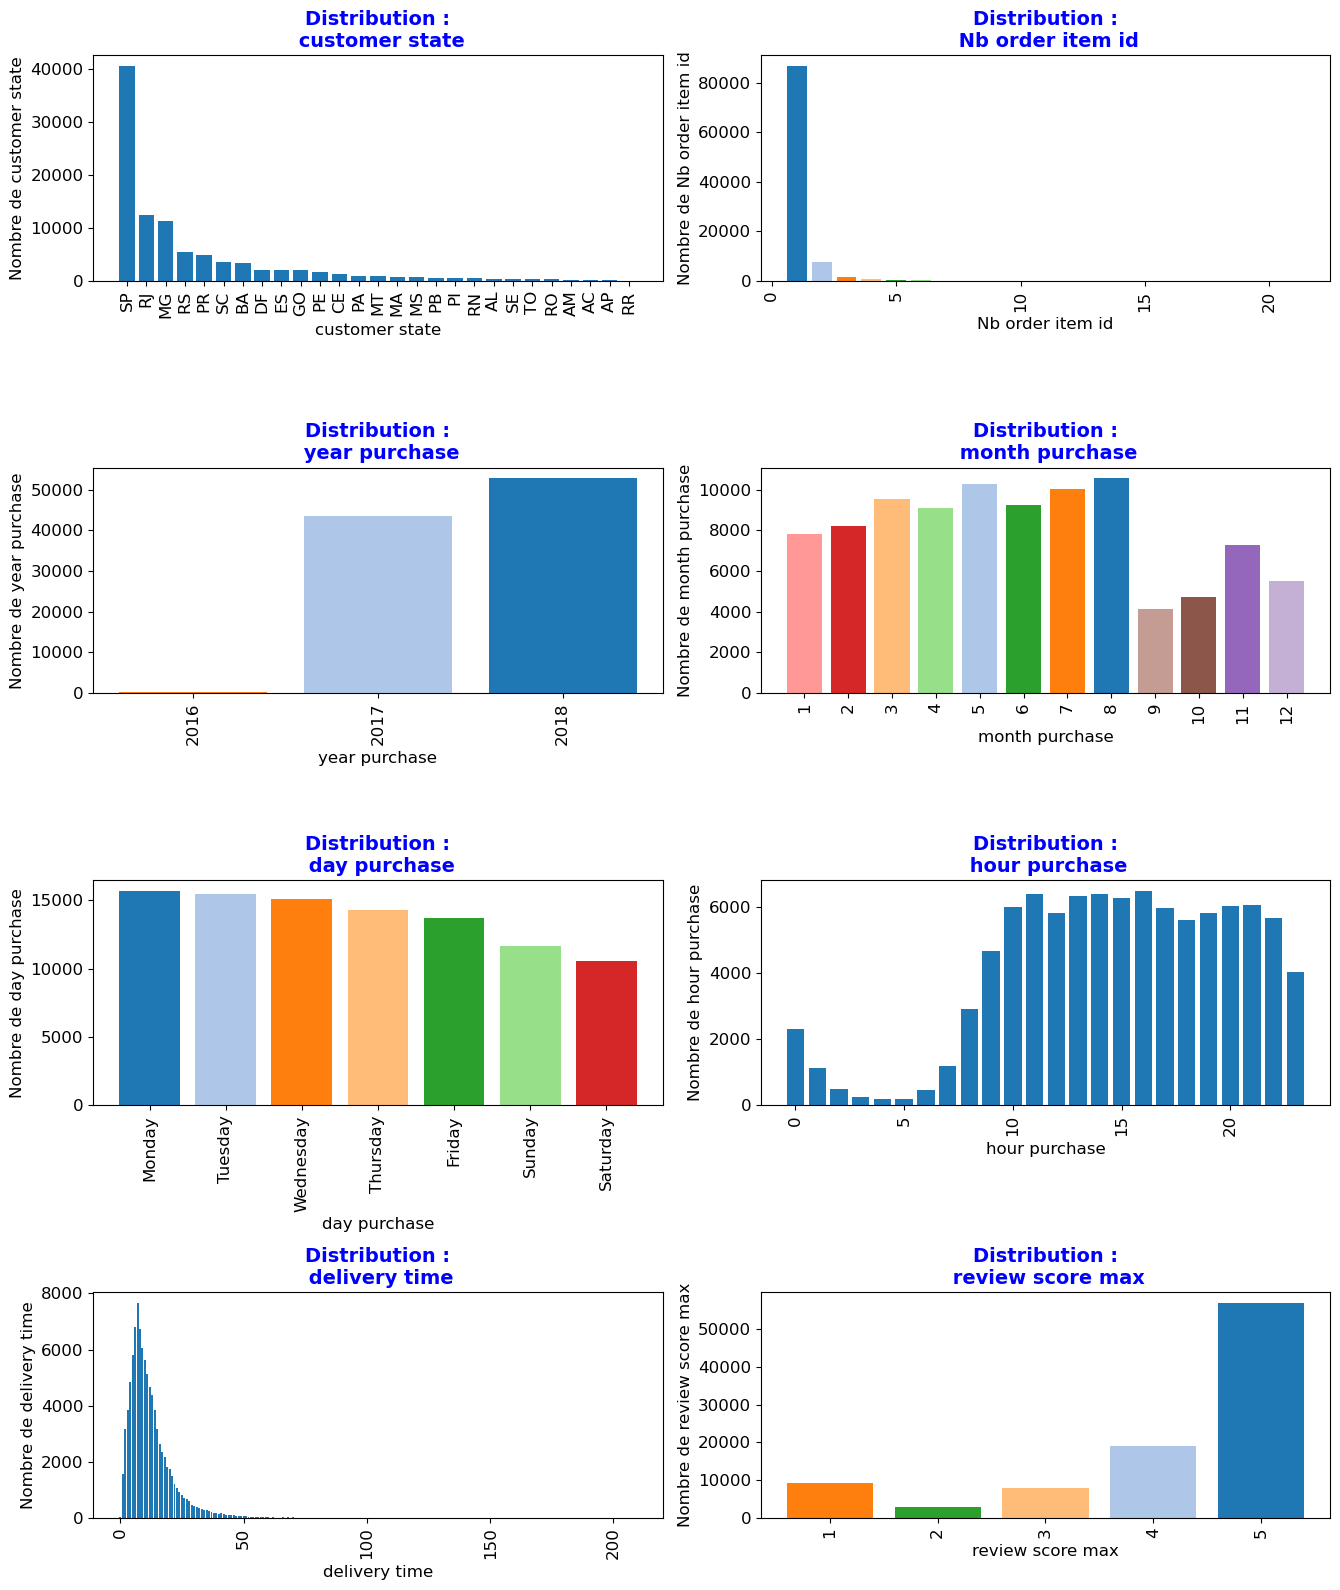

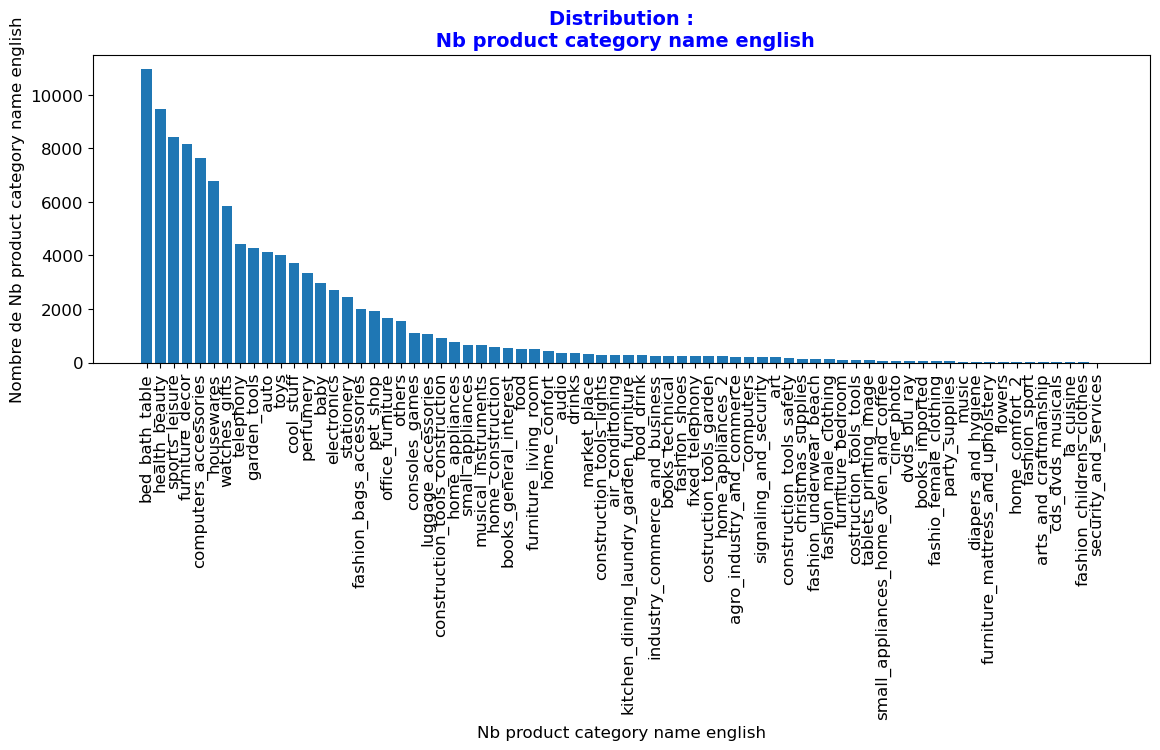

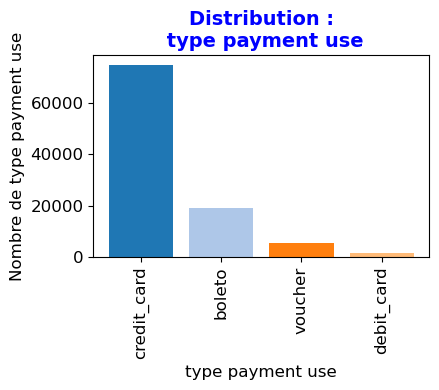

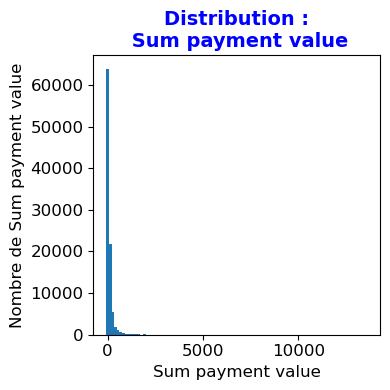

In [34]:
plot_bar(Data_final, ['customer_state','Nb_order_item_id','year_purchase','month_purchase','day_purchase',
                      'hour_purchase','delivery_time','review_score_max'], Nb_cols=2)
plot_bar(unpack_cols(Data_final,'Nb_product_category_name_english'),'Nb_product_category_name_english')
plot_bar(unpack_cols(Data_final,'type_payment_use'),'type_payment_use')
plot_hist(Data_final, 'Sum_payment_value', Nb_cols=1 )

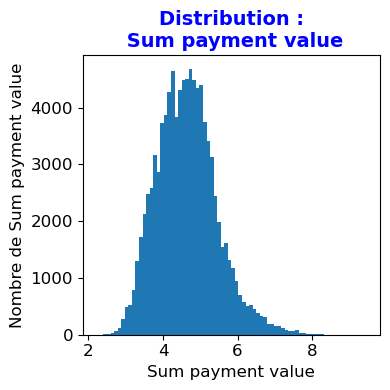

In [35]:
plot_hist(Data_final, 'Sum_payment_value', Nb_cols=1 , log ='yes')

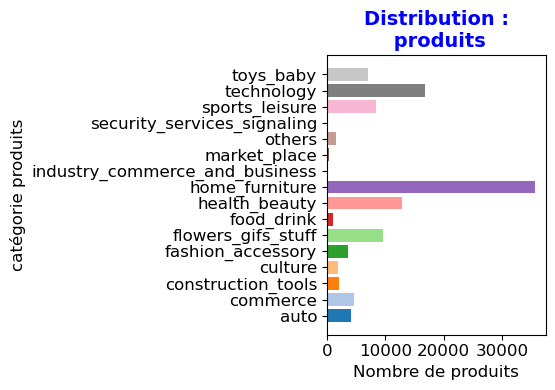

In [36]:
Data_cat = pd.DataFrame(Data_final[cols_cat_enc].T.sum(axis = 1).reset_index())
Data_cat.columns = ['catégorie produits','produits']
plot_bar(Data_cat,'catégorie produits','produits', Nb_cols=2,inverse_xy=True)

## <a STYLE="color:black" id="3.6">3.6 Jeu de données clients : segmentation </a> 
<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Dans cette section, nous allons centrer les données obtenues sur le client grâce à la variable <span STYLE="color:gray;padding-left:0em"><i> 'customer_unique_id'</i></span> et non sur les commandes. De nouvelles variables seront créés.

In [37]:
Data_customer = Data_final.groupby(by='customer_unique_id').agg({'Sum_payment_value' : ['sum','mean'],
                                                                 'order_purchase_timestamp':'max', 
                                                                 'customer_id' : 'count',
                                                                 'review_score_max':'mean',
                                                                 'Nb_payment_sequential':'mean',
                                                                 'Sum_payment_installments':'mean',
                                                                 'Nb_order_item_id':'mean'}).reset_index()

Data_customer.columns = ['customer_unique_id','total_money_spent','mean_money_spent','date_of_last_purchase',
                         'Nb_of_purchases','mean_review_score','mean_payment_sequential','mean_payment_installments',
                         'mean_order_item_per_purchage']

Data_customer['date_of_last_purchase']=(Data_customer['date_of_last_purchase'].max()-Data_customer['date_of_last_purchase']).dt.days

Data_customer_cat = Data_final.groupby(by='customer_unique_id')[cols_cat_enc].agg('mean')
Data_customer_payment = Data_final.groupby(by='customer_unique_id')[cols_payments_enc].agg('mean')
Data_customer_state = Data_final.drop_duplicates(subset='customer_unique_id',keep='first')[['customer_unique_id','customer_state']]

Data_customer = pd.merge(Data_customer,Data_customer_state, how = 'outer', on ='customer_unique_id')
Data_customer = pd.merge(Data_customer,Data_customer_cat, how = 'outer', on ='customer_unique_id')
Data_customer = pd.merge(Data_customer,Data_customer_payment, how = 'outer', on ='customer_unique_id')

display(info_df({'Data_customer' : Data_customer}))
Data_customer

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,Data_customer,customer_unique_id,93357,93357,0,0
1,Data_customer,total_money_spent,28261,93357,0,65096
2,Data_customer,mean_money_spent,28426,93357,0,64931
3,Data_customer,date_of_last_purchase,610,93357,0,92747
4,Data_customer,Nb_of_purchases,9,93357,0,93348
5,Data_customer,mean_review_score,26,93357,603,93330
6,Data_customer,mean_payment_sequential,31,93357,0,93326
7,Data_customer,mean_payment_installments,75,93357,0,93282
8,Data_customer,mean_order_item_per_purchage,39,93357,0,93318
9,Data_customer,customer_state,27,93357,0,93330


,customer_unique_id,total_money_spent,mean_money_spent,date_of_last_purchase,Nb_of_purchases,mean_review_score,mean_payment_sequential,mean_payment_installments,mean_order_item_per_purchage,customer_state,health_beauty,culture,sports_leisure,toys_baby,home_furniture,flowers_gifs_stuff,construction_tools,technology,fashion_accessory,auto,commerce,others,security_services_signaling,industry_commerce_and_business,food_drink,market_place,credit_card,boleto,voucher,debit_card
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,141.90,111,1,5.0,1.0,8.0,1.0,SP,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,27.19,114,1,4.0,1.0,1.0,1.0,SP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,86.22,86.22,536,1,3.0,1.0,8.0,1.0,SC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,43.62,320,1,4.0,1.0,4.0,1.0,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,196.89,196.89,287,1,5.0,1.0,6.0,1.0,SP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2067.42,446,1,5.0,1.0,10.0,2.0,PE,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
93353,fffea47cd6d3cc0a88bd621562a9d061,84.58,84.58,261,1,4.0,1.0,1.0,1.0,BA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
93354,ffff371b4d645b6ecea244b27531430a,112.46,112.46,567,1,5.0,1.0,1.0,1.0,MT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
93355,ffff5962728ec6157033ef9805bacc48,133.69,133.69,118,1,5.0,1.0,5.0,1.0,ES,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


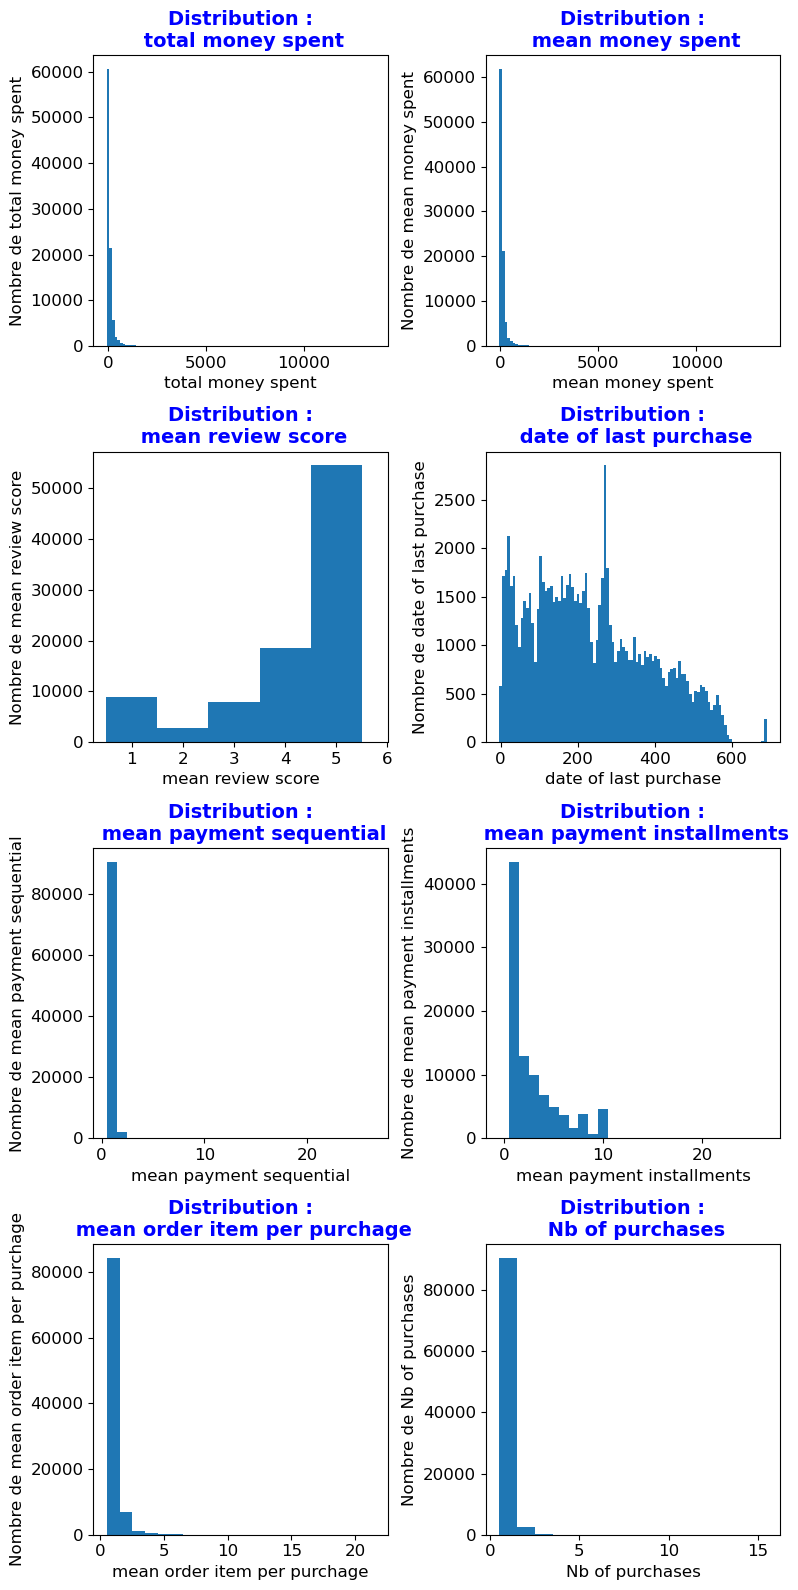

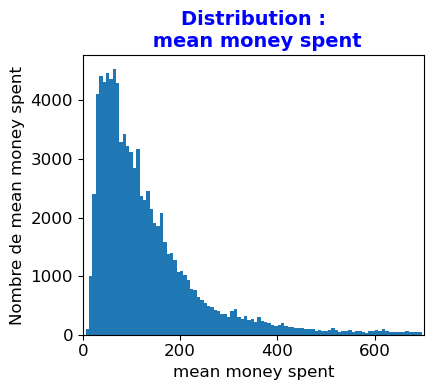

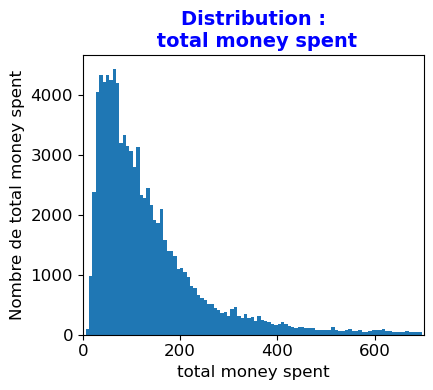

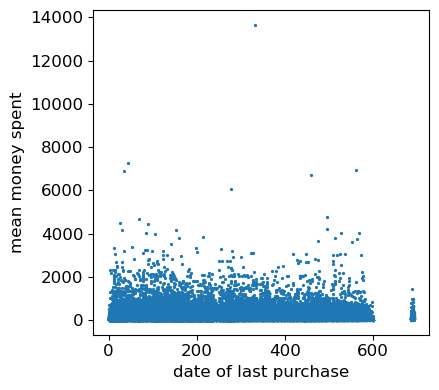

In [38]:
label.update({x : x.replace('_',' ') for x in Data_customer.columns})
plot_hist(Data_customer, ['total_money_spent','mean_money_spent','mean_review_score','date_of_last_purchase','mean_payment_sequential',
                          'mean_payment_installments','mean_order_item_per_purchage','Nb_of_purchases'], Nb_cols = 2)
plot_hist(Data_customer,'mean_money_spent', Nb_cols = 2,x_lim =(0,Data_customer['total_money_spent'].quantile(0.975)))
plot_hist(Data_customer,'total_money_spent', Nb_cols = 2,x_lim =(0,Data_customer['total_money_spent'].quantile(0.975)))
plot_scatter(Data_customer,'date_of_last_purchase','mean_money_spent')

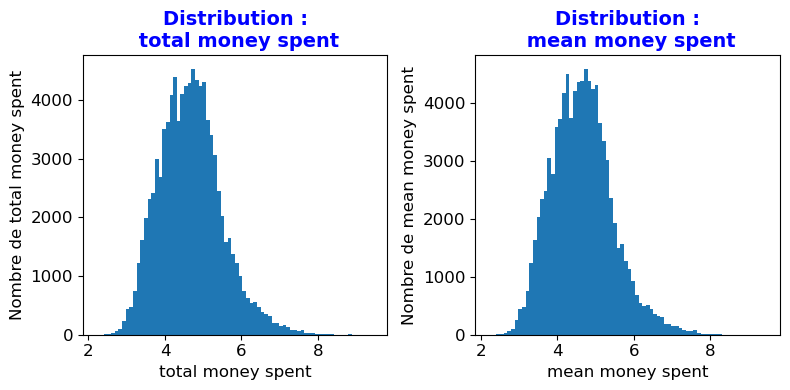

In [39]:
plot_hist(Data_customer, ['total_money_spent','mean_money_spent'], Nb_cols=2 , log ='yes')

In [40]:
display(info_df({'Data_customer' : Data_customer}))
Data_customer['mean_review_score'].fillna(0, inplace = True)

,Nom Data,Nom cols,Valeurs uniques,Nb valeurs,Nb valeurs Nan,Nb doublons
0,Data_customer,customer_unique_id,93357,93357,0,0
1,Data_customer,total_money_spent,28261,93357,0,65096
2,Data_customer,mean_money_spent,28426,93357,0,64931
3,Data_customer,date_of_last_purchase,610,93357,0,92747
4,Data_customer,Nb_of_purchases,9,93357,0,93348
5,Data_customer,mean_review_score,26,93357,603,93330
6,Data_customer,mean_payment_sequential,31,93357,0,93326
7,Data_customer,mean_payment_installments,75,93357,0,93282
8,Data_customer,mean_order_item_per_purchage,39,93357,0,93318
9,Data_customer,customer_state,27,93357,0,93330


<p STYLE="padding-left:1em;color:blue;text-align: justify;"><b> Les valeurs nulles de la variable <span STYLE="color:gray;padding-left:0em"><i> 'mean_review_score'</i></span> sont remplacées par la valeur 0 et traduit une absence de score 

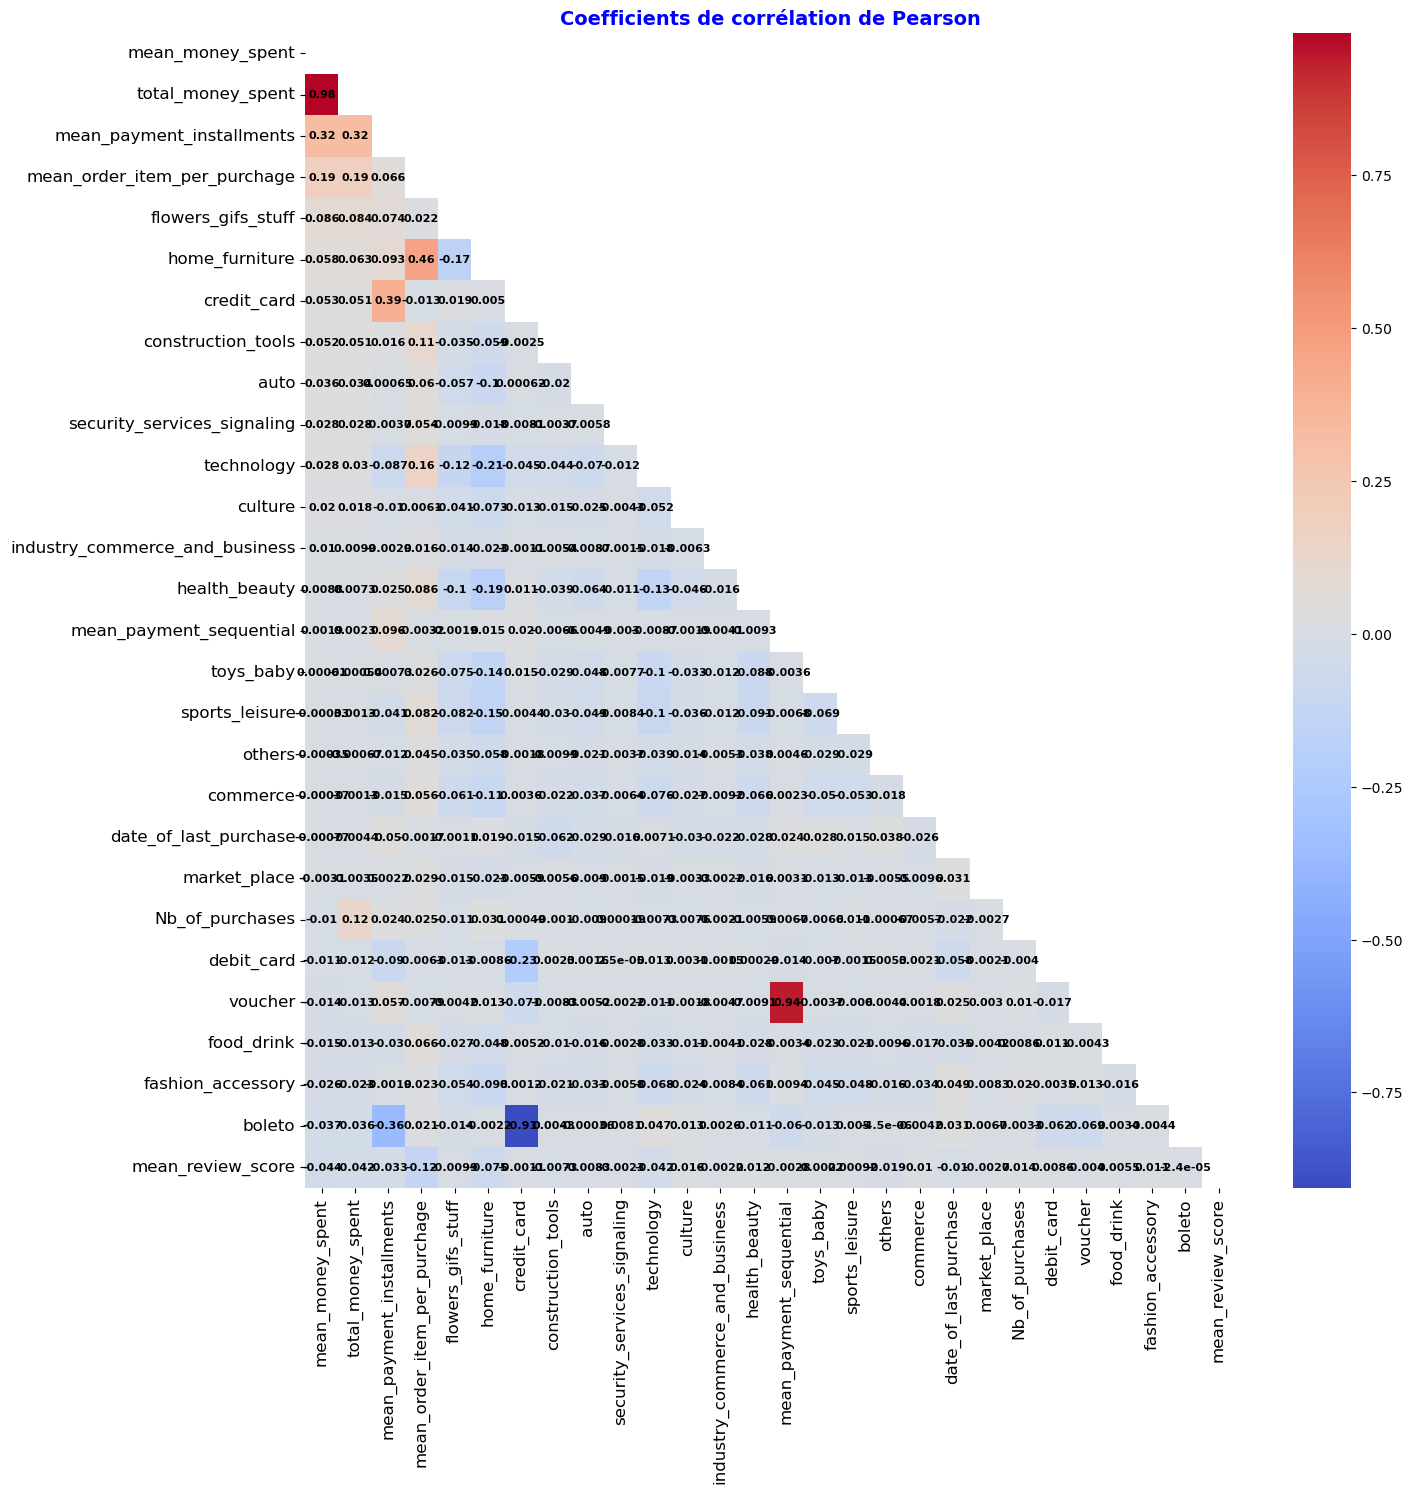

In [41]:
mat_cor(Data_customer, sort_var ='mean_money_spent')

# <a STYLE="color:black;padding-left:0em" id="4">Etape 4 : Export du jeu de donnée

In [42]:
Data_customer.to_csv('P04_Data_customer.csv',index=False)
Data_final.to_csv('P04_Data_orders.csv',index=False)